In [3]:

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
import pandas as pd
from googletrans import Translator, LANGUAGES, LANGCODES
from glob import glob
from wordcloud import WordCloud, STOPWORDS 
import unidecode
 #from py_translator import Translator
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
mpl.rcParams['axes.titlepad'] = 10

plt.rcParams['font.size']=40
plt.rcParams['figure.figsize']=(12,16)

In [4]:
artists = pd.read_csv('Artistas_astroarteagujero - Form responses 1.csv')

In [5]:
artists.loc[2,'Country'] = 'Colombia'  #removes funny entry

In [6]:
artists.loc[:,'Country']  = artists.loc[:,'Country'].map(lambda x: unidecode.unidecode(x) if x==x else np.nan)  #gets rid of accents

In [7]:
artists.loc[:,'Country']  = artists.loc[:,'Country'].map(lambda x: x.strip(' ') if x==x else np.nan) #gets rid of spaces

In [8]:
artists.loc[:,'Country']  = artists.loc[:,'Country'].str.title()  #gets everything in upper case first letter

In [9]:
artists.loc[:,'Country'] = artists.loc[:,'Country'].map(lambda x: 'US' if x=='Estados Unidos' else x)

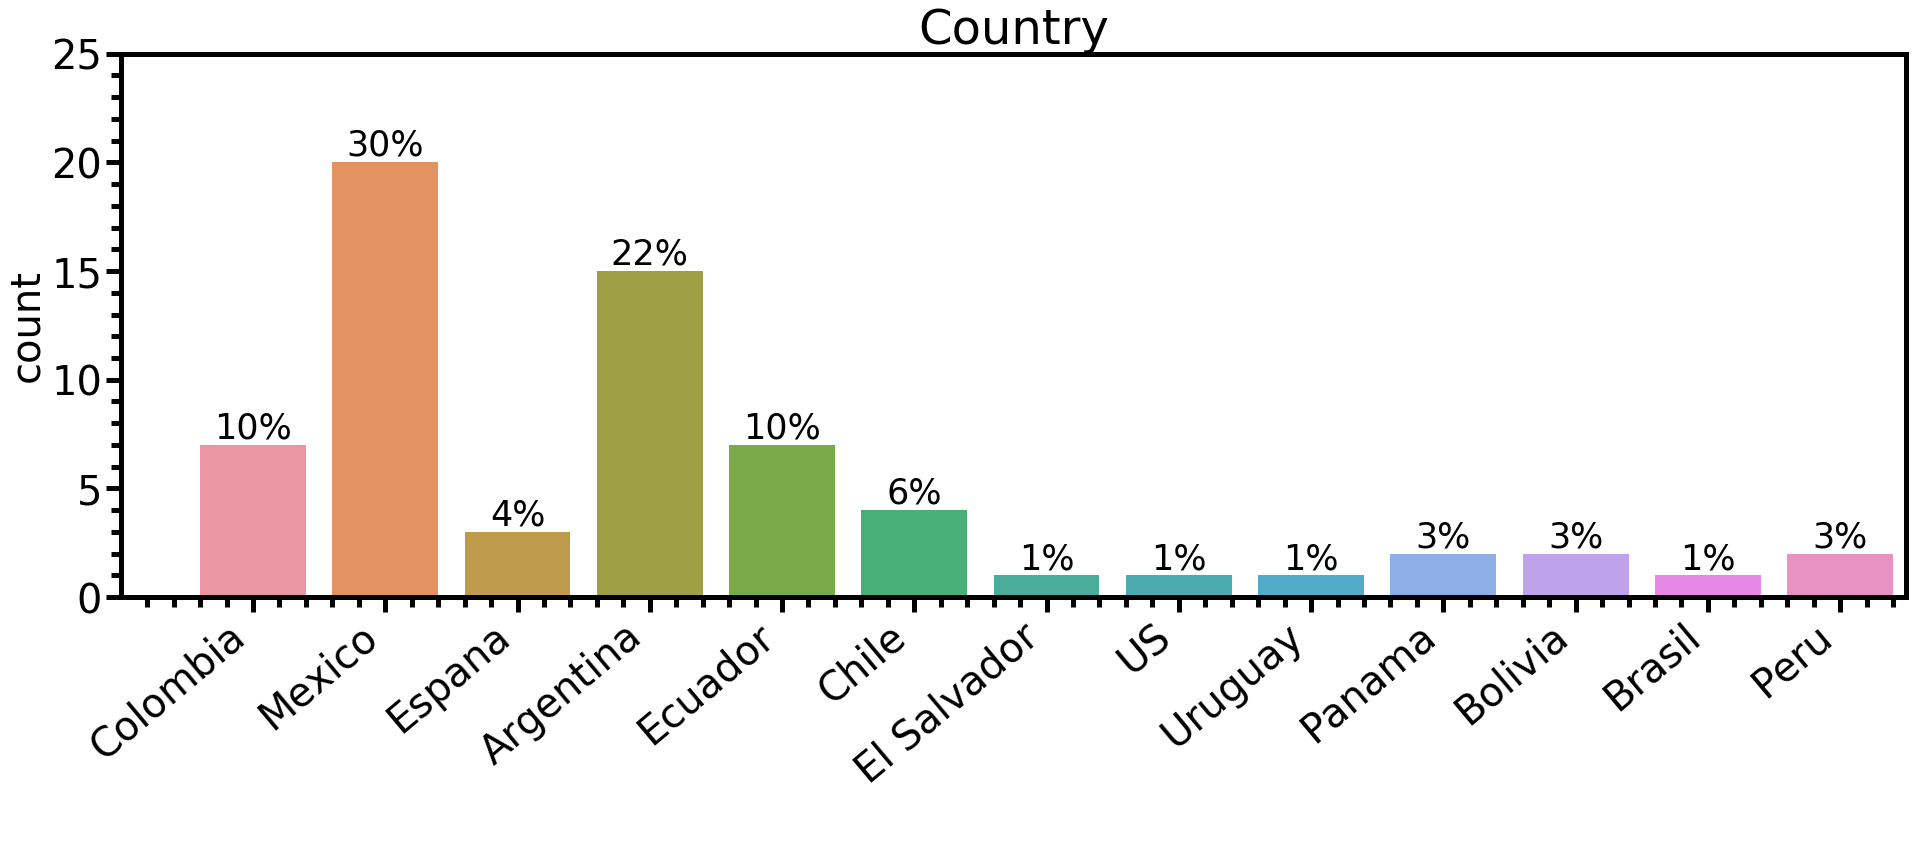

In [10]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists['Country'], )
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Country')
plt.xlabel(' ')
plt.ylim(0,25)
plt.savefig('Country_artists.png', bbox_inches='tight')


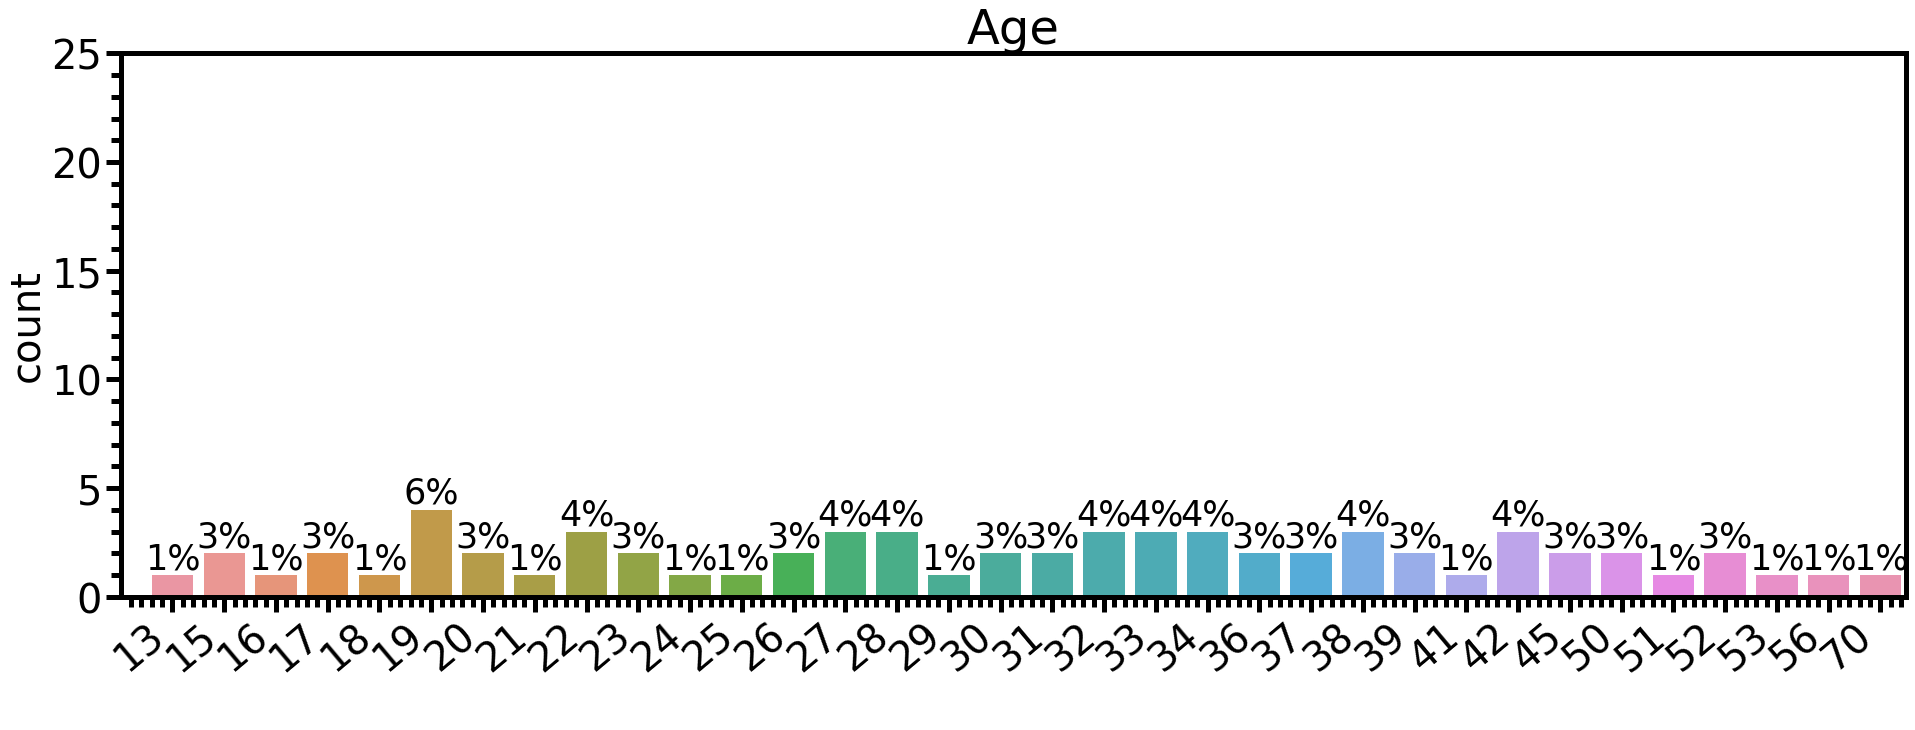

In [155]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['Age'].isna()]['Age'].astype(int))
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Age')
plt.xlabel(' ')
plt.ylim(0,25)
plt.savefig('Age_artists.png', bbox_inches='tight')

In [156]:
artists.columns

Index(['Timestamp', 'Country', 'Age', 'How did you know about the podcast?',
       'Number artworks', 'Time when you listened to the podcast',
       'How much didi you enjoy the podcast?', 'Interest before',
       'Knowledge before', 'Interest after', 'Knowledge after',
       'What did you learn today?', 'Did you look more into black holes?',
       'If yes, how?', 'Effect on how you see astronomers and astronomy?',
       'How much did you like it?', 'Would you participate again?',
       'Inspiration for mixing arts and science',
       'Recibimos muchas obras donde se representaba la "espaguetización",  el efecto "de estiramiento" debido a la fuerte gravedad cerca de un agujero negro. Nos preguntábamos cuál de las sientes opciones piensas que es la más correcta: "La Humanidad...',
       'Acá te dejo un espacio para que me cuentes lo que quieras  sobre el podcast, las preguntas que te quedaron por responder, cualquier cosa que quieras relacionado con esta experiencia de mezclar 

In [157]:
def func(x):
    if x==1:
        return 'Not at all' 
    elif x==2:
        return 'Not so much' 
    elif x==3:
        return 'Not sure' 
    elif x==4:
        return 'A bit' 
    elif x==5:
        return 'A lot'
    else:
        return np.nan
    
artists.loc[:,'How much didi you enjoy the podcast?'] = artists.loc[:,'How much didi you enjoy the podcast?'].apply(lambda x: func(x))

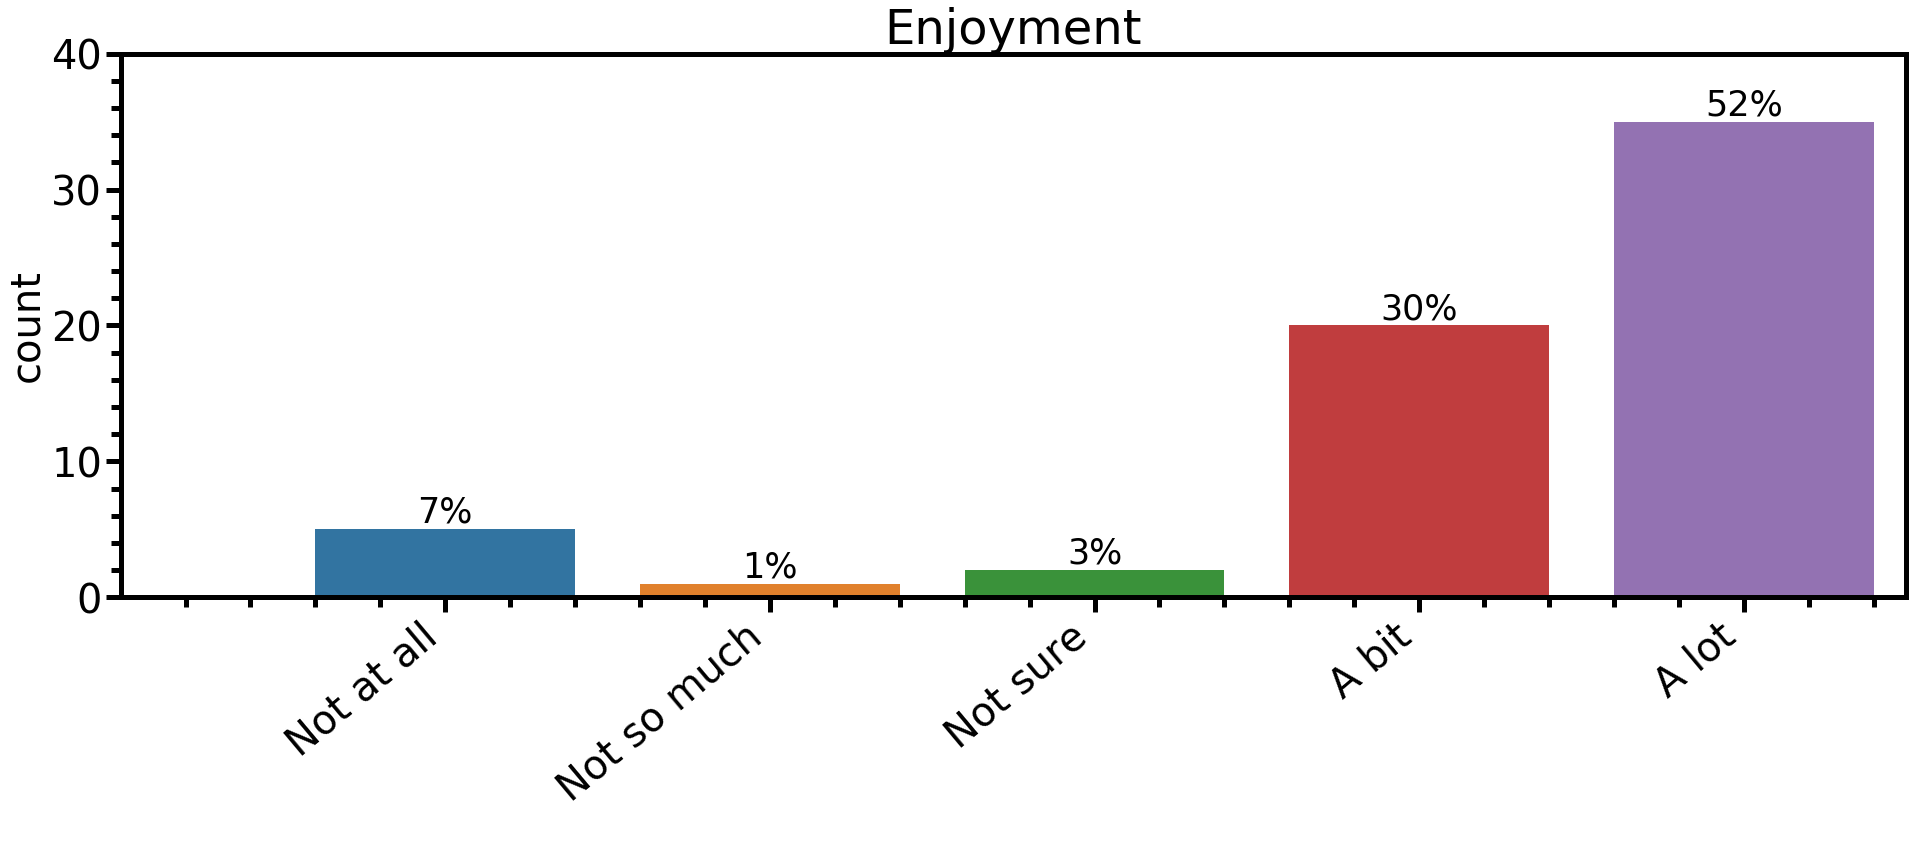

In [158]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['How much didi you enjoy the podcast?'].isna()]['How much didi you enjoy the podcast?'],
                  order=['Not at all','Not so much','Not sure','A bit','A lot'])
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Enjoyment')
plt.xlabel(' ')
plt.ylim(0,40)
plt.savefig('enjoyment_artists.png', bbox_inches='tight')

In [159]:
# how did you know about the podcast? [need to group by larger categories?]

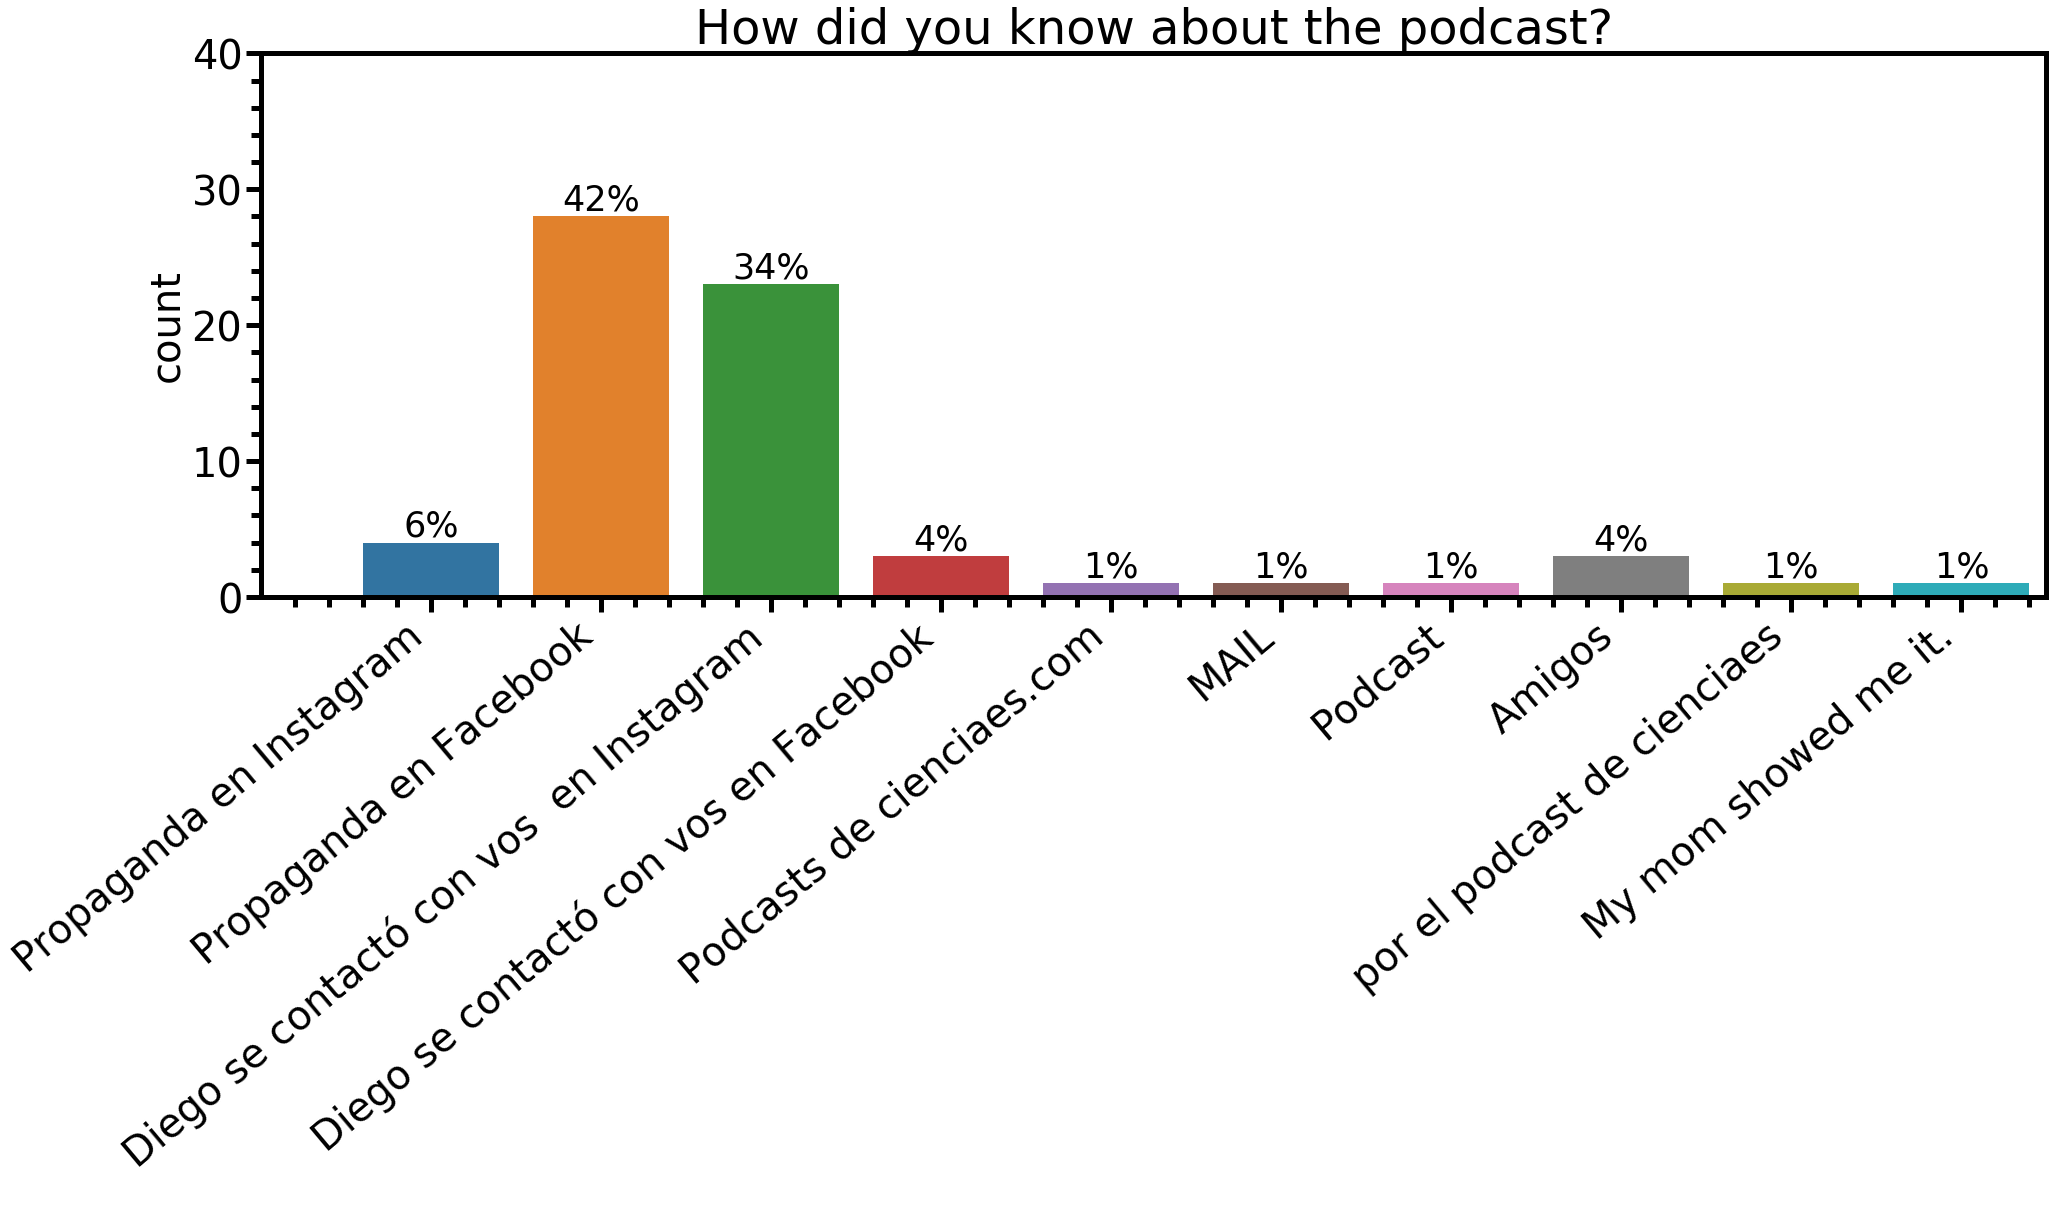

In [160]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['How did you know about the podcast?'].isna()]['How did you know about the podcast?'],
                  )
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('How did you know about the podcast?')
plt.xlabel(' ')
plt.ylim(0,40)
plt.savefig('howdidyoujknowaboutthecompetition_artists.png', bbox_inches='tight')

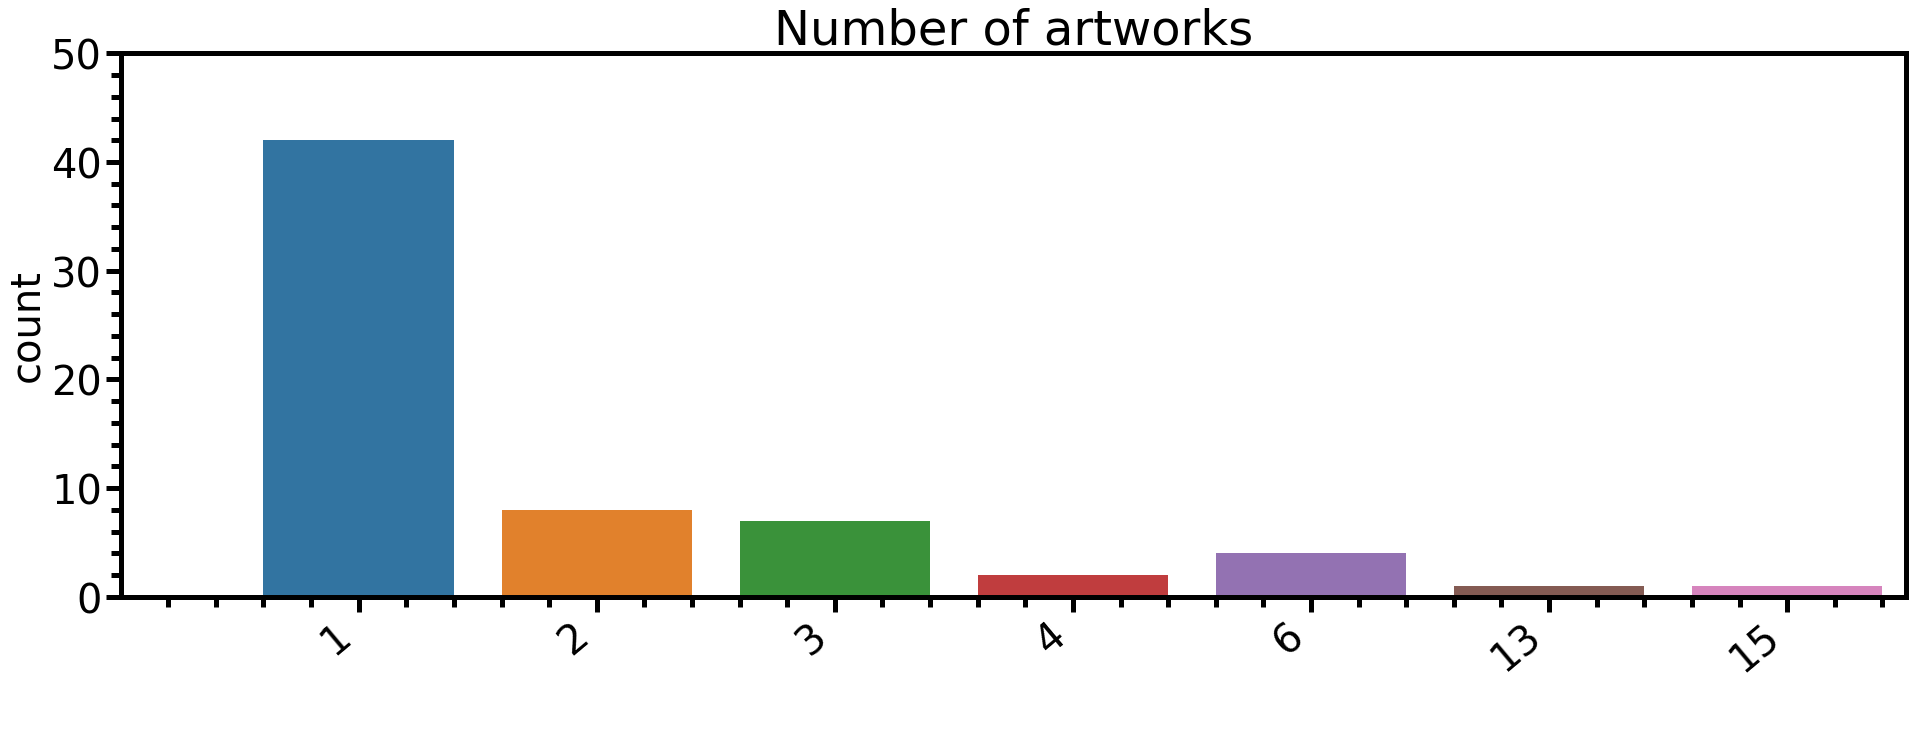

In [161]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['Number artworks'].isna()]['Number artworks'].astype(int)
                  )
ncount = len(artists)
#for p in ax.patches:
#    x=p.get_bbox().get_points()[:,0]
#    y=p.get_bbox().get_points()[1,1]
#    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
#            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Number of artworks')
plt.xlabel(' ')
plt.ylim(0,50)
plt.savefig('N_artworks_artists.png', bbox_inches='tight')

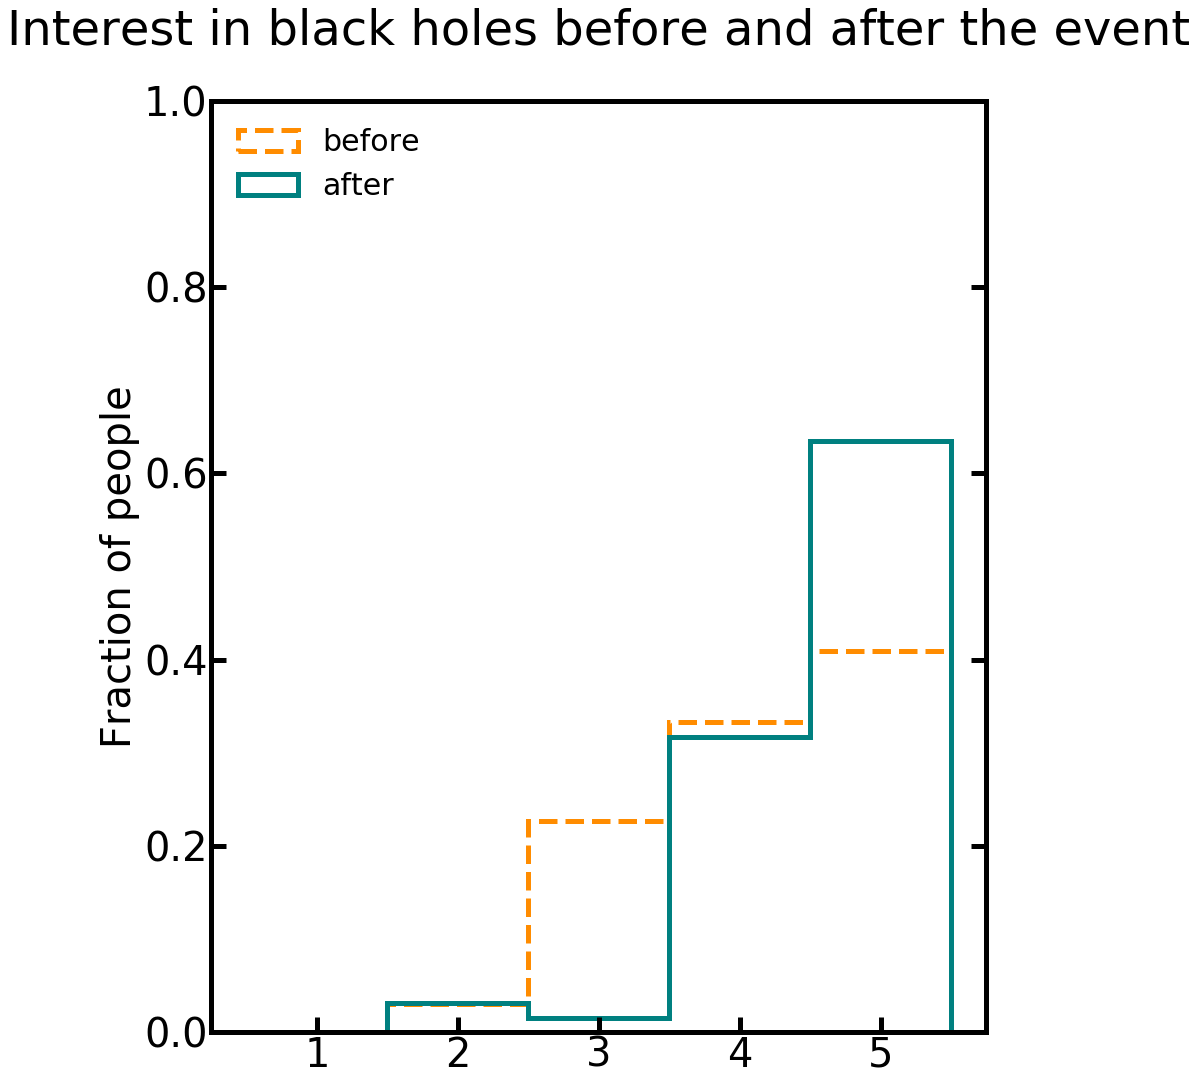

In [162]:
f,ax=plt.subplots(figsize=(16,16))
artists['Interest before'].hist(ax=ax,density=True,bins=np.linspace(0.5,5.5,6),
                                                     grid=False,histtype='step',color='darkorange',label='before',lw=5,ls='--')
artists['Interest after'].hist(ax=ax,label='after',density=True,bins=np.linspace(0.5,5.5,6),
                                       grid=False,histtype='step',color='teal',lw=5,ls='-')
#ax.set_title(“R. Fear: Interest in physics\n before/after challenge")
ax.set_title("Interest in black holes before and after the event", y=1.05)
ax.set_ylabel("Fraction of people")
ax.tick_params(right=True,direction="in")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(0,1)
plt.minorticks_off()
ax.legend(loc="upper left", fontsize=30, frameon=False)
plt.tight_layout()
plt.savefig('interest_artists.png', bbox_inches='tight')

In [163]:
artists['delta interest'] = artists['Interest after'] - artists['Interest before']

No handles with labels found to put in legend.


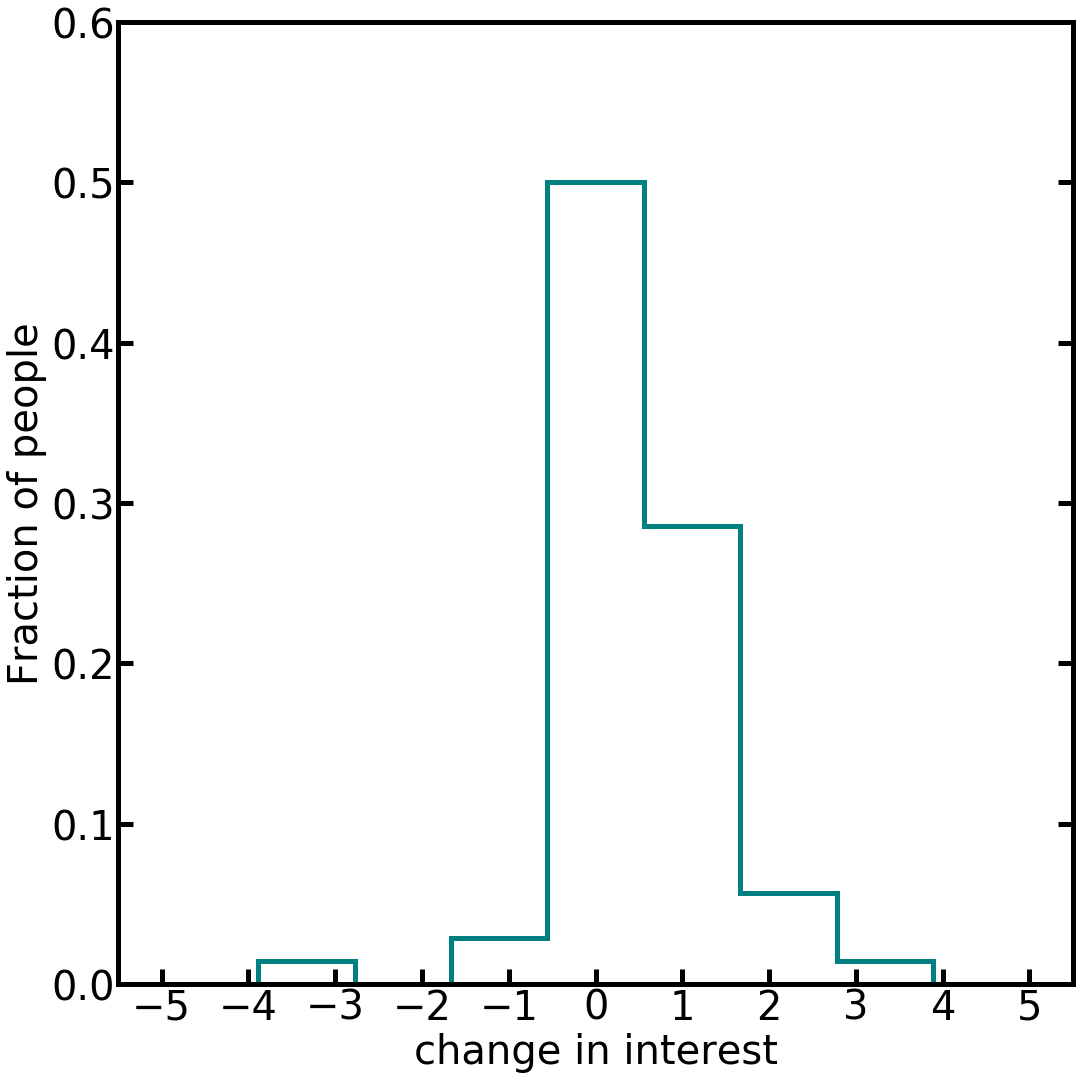

In [164]:
f,ax=plt.subplots(figsize=(16,16))

artists['delta interest'].hist(ax=ax,label='',density=True,bins=np.linspace(-5,5,10),
                                       grid=False,histtype='step',color='teal',lw=5,ls='-', )
#ax.set_title(“R. Fear: Interest in physics\n before/after challenge")
#ax.set_title("Interest in black holes before and after the event", y=1.05)
ax.set_ylabel("Fraction of people")
ax.tick_params(right=True,direction="in")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(0,0.6)
plt.minorticks_off()
ax.legend(loc="upper left", fontsize=30, frameon=False)
ax.set_xlabel('change in interest')
plt.tight_layout()
plt.savefig('change_interest_artists.png', bbox_inches='tight')

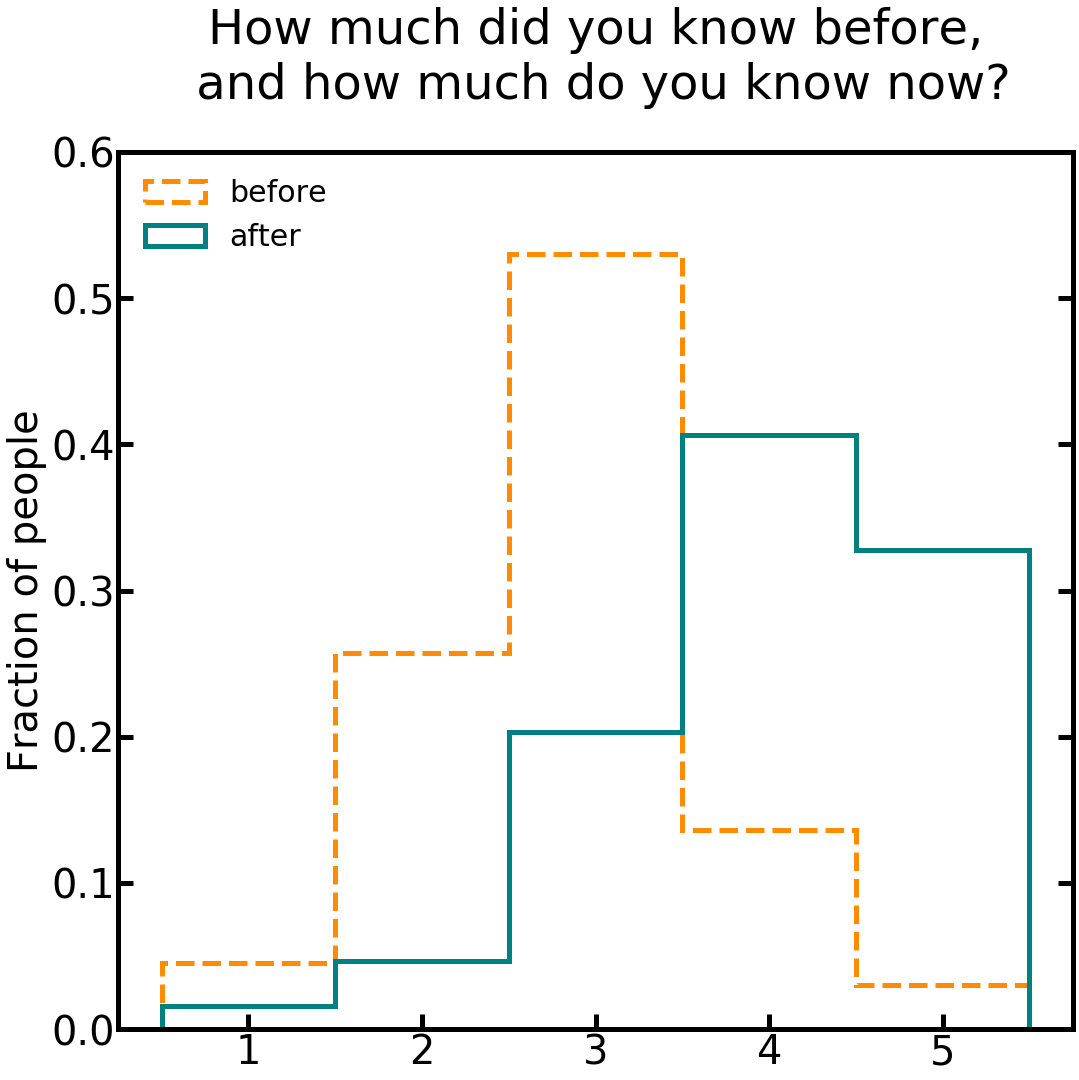

In [165]:
f,ax=plt.subplots(figsize=(16,16))
artists['Knowledge before'].hist(ax=ax,density=True,bins=np.linspace(0.5,5.5,6),
                                                     grid=False,histtype='step',color='darkorange',label='before',lw=5,ls='--')
artists['Knowledge after'].hist(ax=ax,label='after',density=True,bins=np.linspace(0.5,5.5,6),
                                       grid=False,histtype='step',color='teal',lw=5,ls='-')
#ax.set_title(“R. Fear: Interest in physics\n before/after challenge")
ax.set_title("How much did you know before,\n and how much do you know now?", y=1.05)
ax.set_ylabel("Fraction of people")
ax.tick_params(right=True,direction="in")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(0,0.6)
plt.minorticks_off()
ax.legend(loc="upper left", fontsize=30, frameon=False)
plt.tight_layout()
plt.savefig('knowledge_artists.png', bbox_inches='tight')

In [166]:
artists['delta knowledge'] = artists['Knowledge after'] - artists['Knowledge before']

No handles with labels found to put in legend.


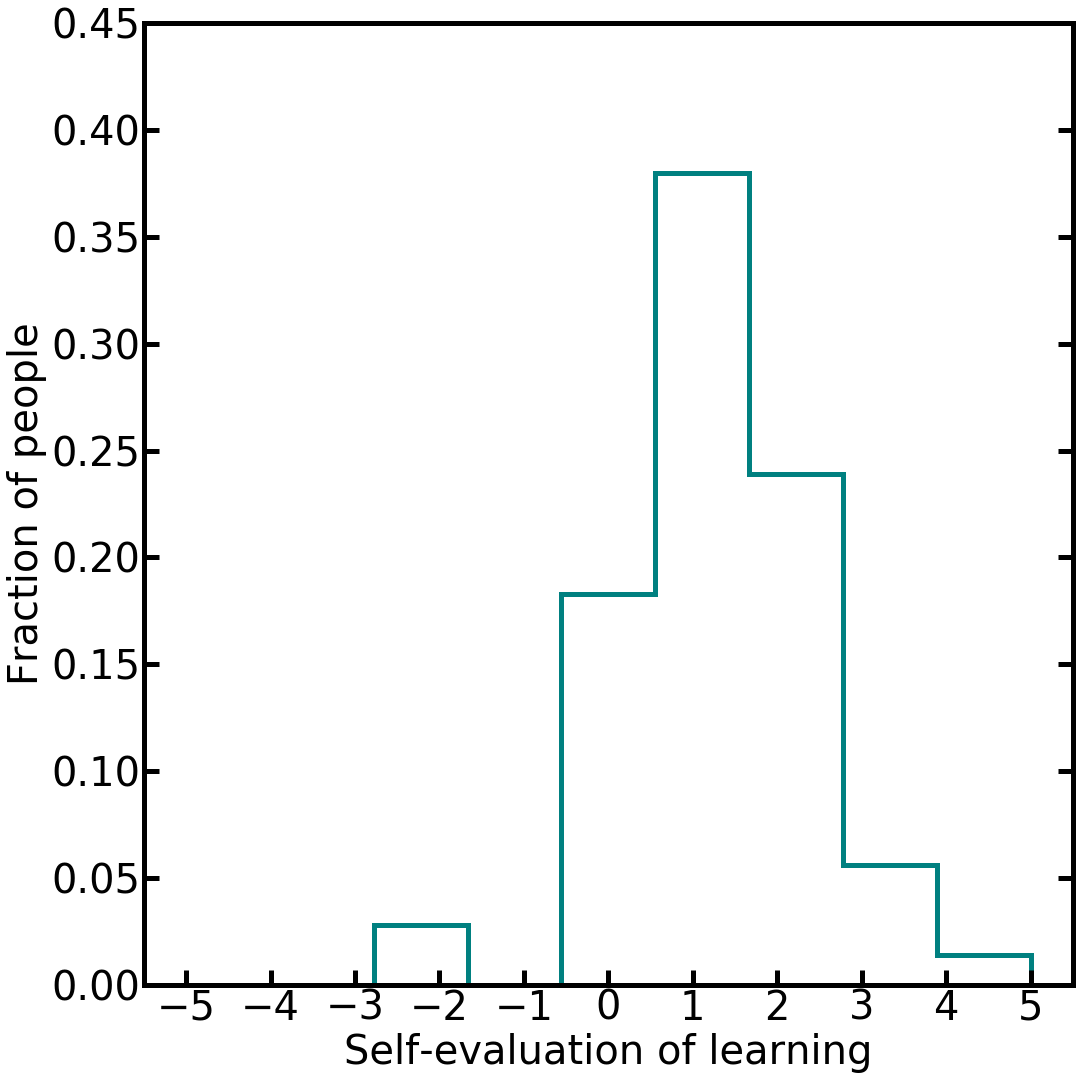

In [167]:
f,ax=plt.subplots(figsize=(16,16))

artists['delta knowledge'].hist(ax=ax,label='',density=True,bins=np.linspace(-5,5,10),
                                       grid=False,histtype='step',color='teal',lw=5,ls='-', )
#ax.set_title(“R. Fear: Interest in physics\n before/after challenge")
#ax.set_title("Interest in black holes before and after the event", y=1.05)
ax.set_ylabel("Fraction of people")
ax.tick_params(right=True,direction="in")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(0,0.45)
plt.minorticks_off()
ax.legend(loc="upper left", fontsize=30, frameon=False)
ax.set_xlabel('Self-evaluation of learning')
plt.tight_layout()
plt.savefig('change_knowledge_artists.png', bbox_inches='tight')

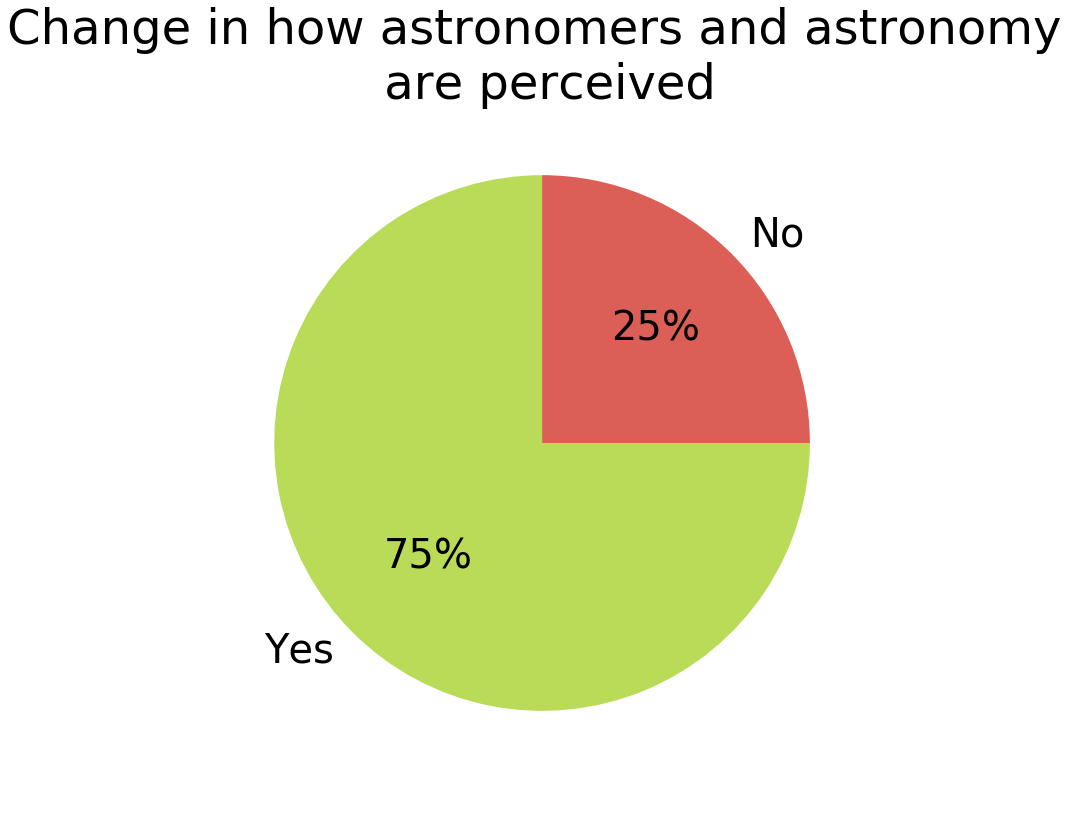

In [173]:
artists.loc[:,'Effect on how you see astronomers and astronomy?'] = artists.loc[:,'Effect on how you see astronomers and astronomy?'].apply(lambda x: 'Yes' if x=='Sí' else x)
pal = sns.color_palette('hls',n_colors=5)

artists['Effect on how you see astronomers and astronomy?'].value_counts().sort_index().plot.pie(autopct='%1.0f%%',label='',colors=[pal[0],pal[1],pal[2],pal[4],pal[3]])
plt.title('Change in how astronomers and astronomy \n are perceived')
plt.xlabel(' ')
plt.savefig('effect_how_you_see_astronomers.png', bbox_inches='tight')

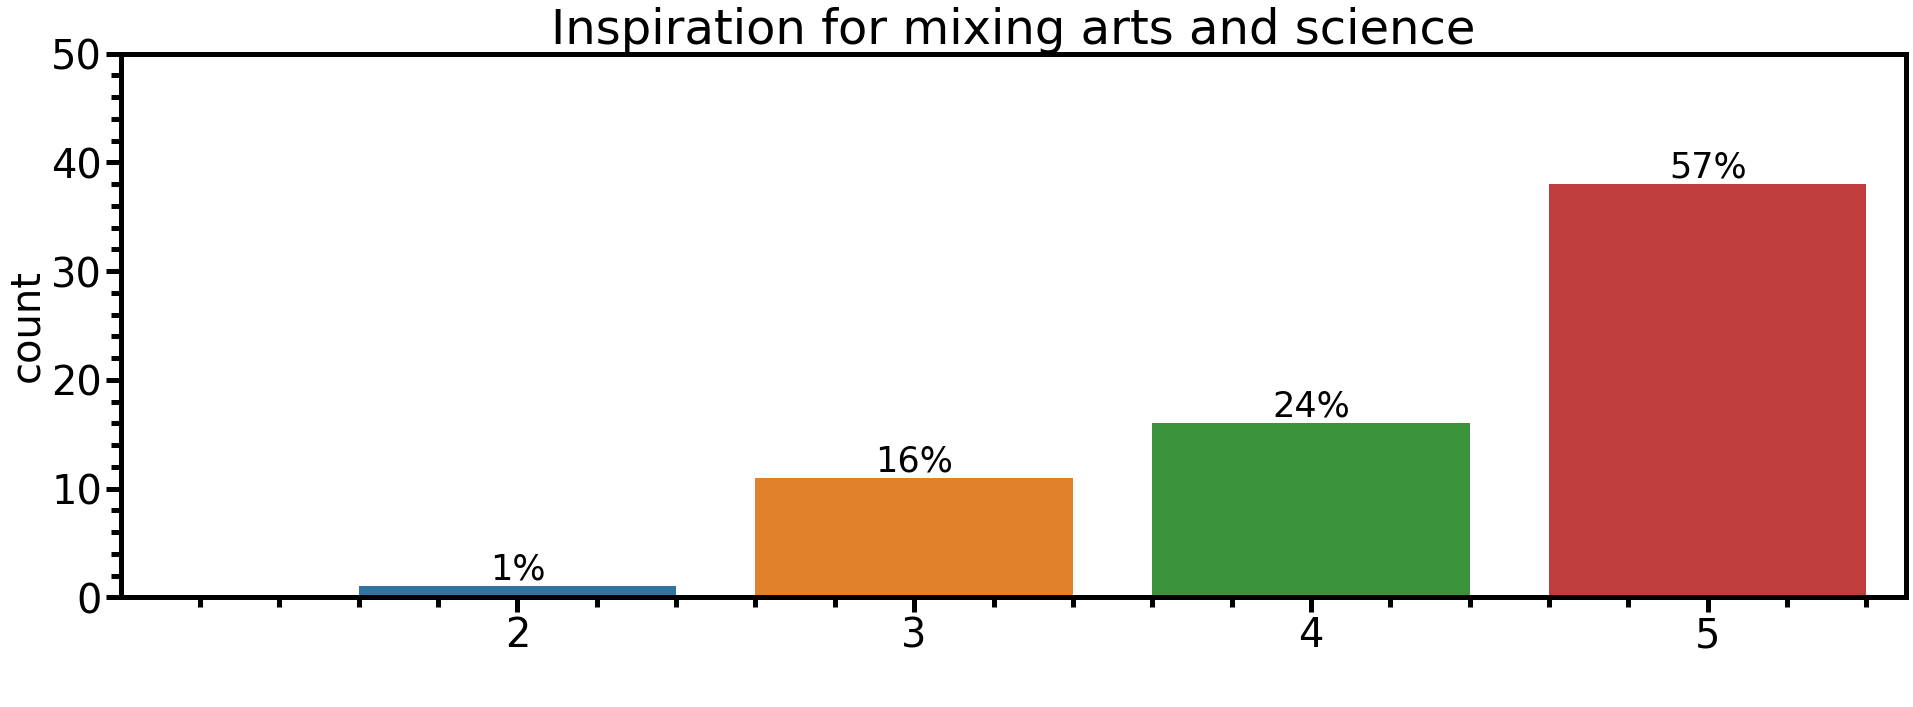

In [12]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['Inspiration for mixing arts and science'].isna()]['Inspiration for mixing arts and science'].astype(int),
                  )
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Inspiration for mixing arts and science')
plt.xlabel(' ')
plt.ylim(0,50)
plt.savefig('inspiration_artists.png', bbox_inches='tight')

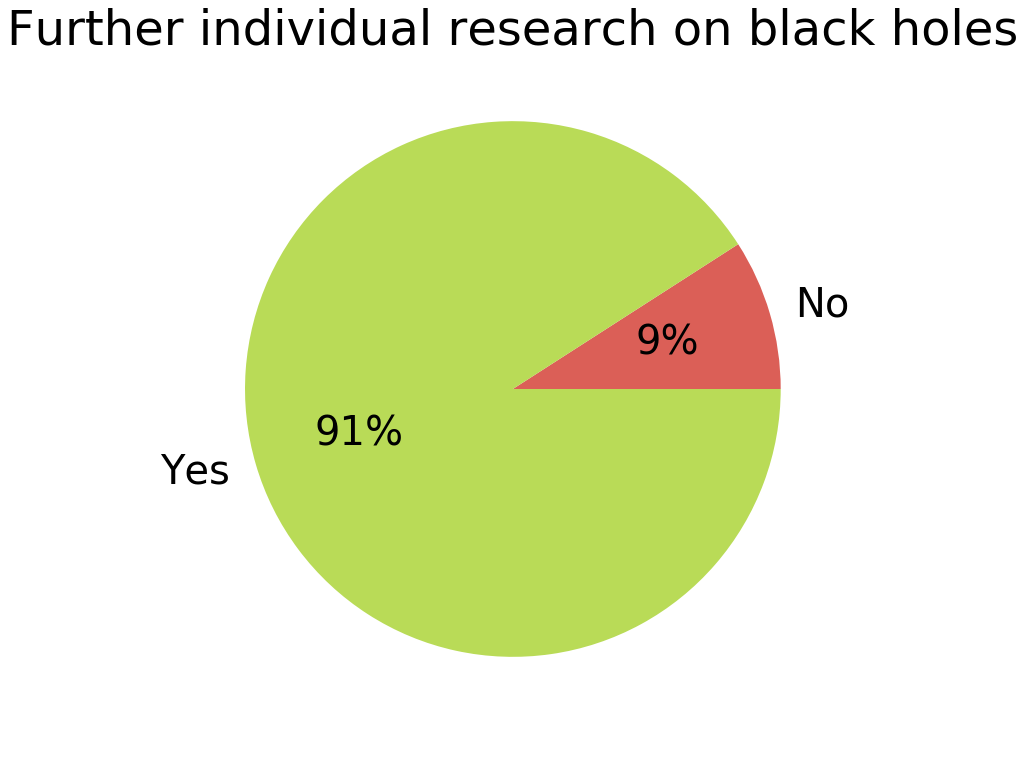

In [181]:
artists.loc[:,'Did you look more into black holes?'] = artists.loc[:,'Did you look more into black holes?'].apply(lambda x: 'Yes' if x=='Sí' else x)
pal = sns.color_palette('hls',n_colors=5)

artists['Did you look more into black holes?'].value_counts().sort_index().plot.pie(autopct='%1.0f%%',label='',colors=[pal[0],pal[1],pal[2],pal[4],pal[3]])
plt.title('Further individual research on black holes')
plt.xlabel(' ')
plt.savefig('research_into_BH_artists.png', bbox_inches='tight')

In [188]:
def func(x):
    if x==1:
        return 'Not at all' 
    elif x==2:
        return 'Not so much' 
    elif x==3:
        return 'Not sure' 
    elif x==4:
        return 'A bit' 
    elif x==5:
        return 'A lot'
    else:
        return np.nan
    
    
artists.loc[:,'How much did you like it?'] = artists.loc[:,'How much did you like it?'].apply(lambda x: func(x))

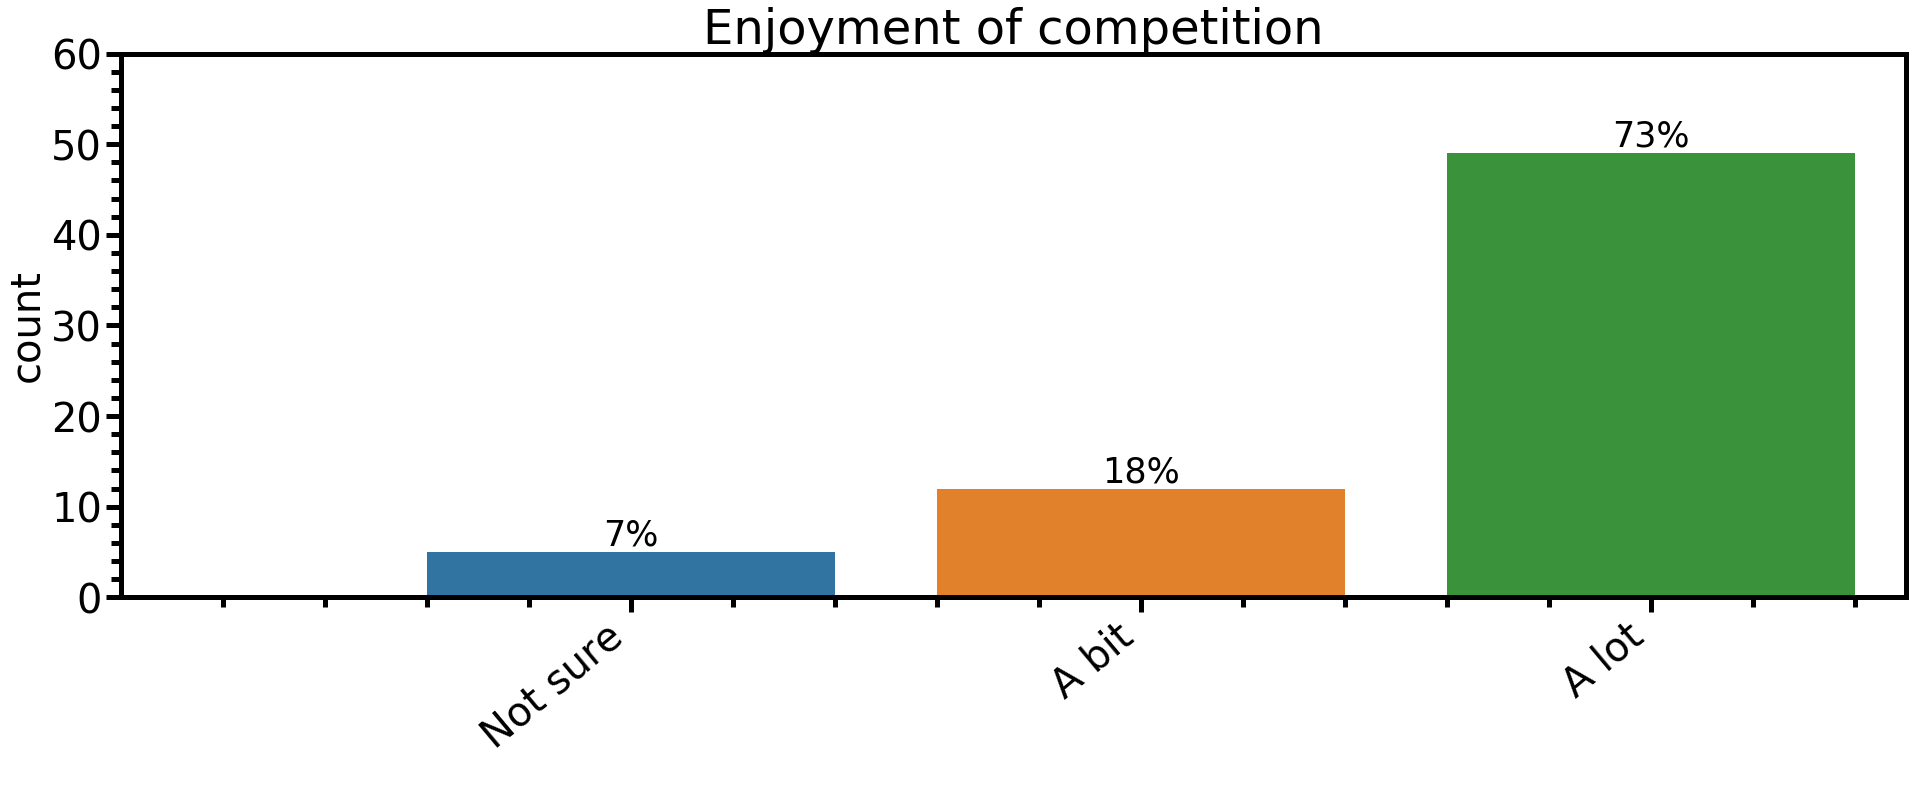

In [191]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['How much did you like it?'].isna()]['How much did you like it?'], 
                   order=['Not sure','A bit','A lot']
                  )
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Enjoyment of competition')
plt.xlabel(' ')
plt.ylim(0,60)
plt.savefig('like_competition_artists.png', bbox_inches='tight')

In [13]:
learning = pd.read_csv('Learning_coded.csv')

In [15]:
def ll(x):
    if x==1 :
        x = 'other'
    if x==2:
        x = 'generic astronomy'
    if x==3:
        x = 'basic BH concepts'
    if x==4:
        x = 'advanced BH concepts'
    if x==5:
        x = 'research-specific concepts'
    return x
    
learning['Coded learning (artists)'] = learning['Coded learning (artists)'].apply(lambda x: ll(x))


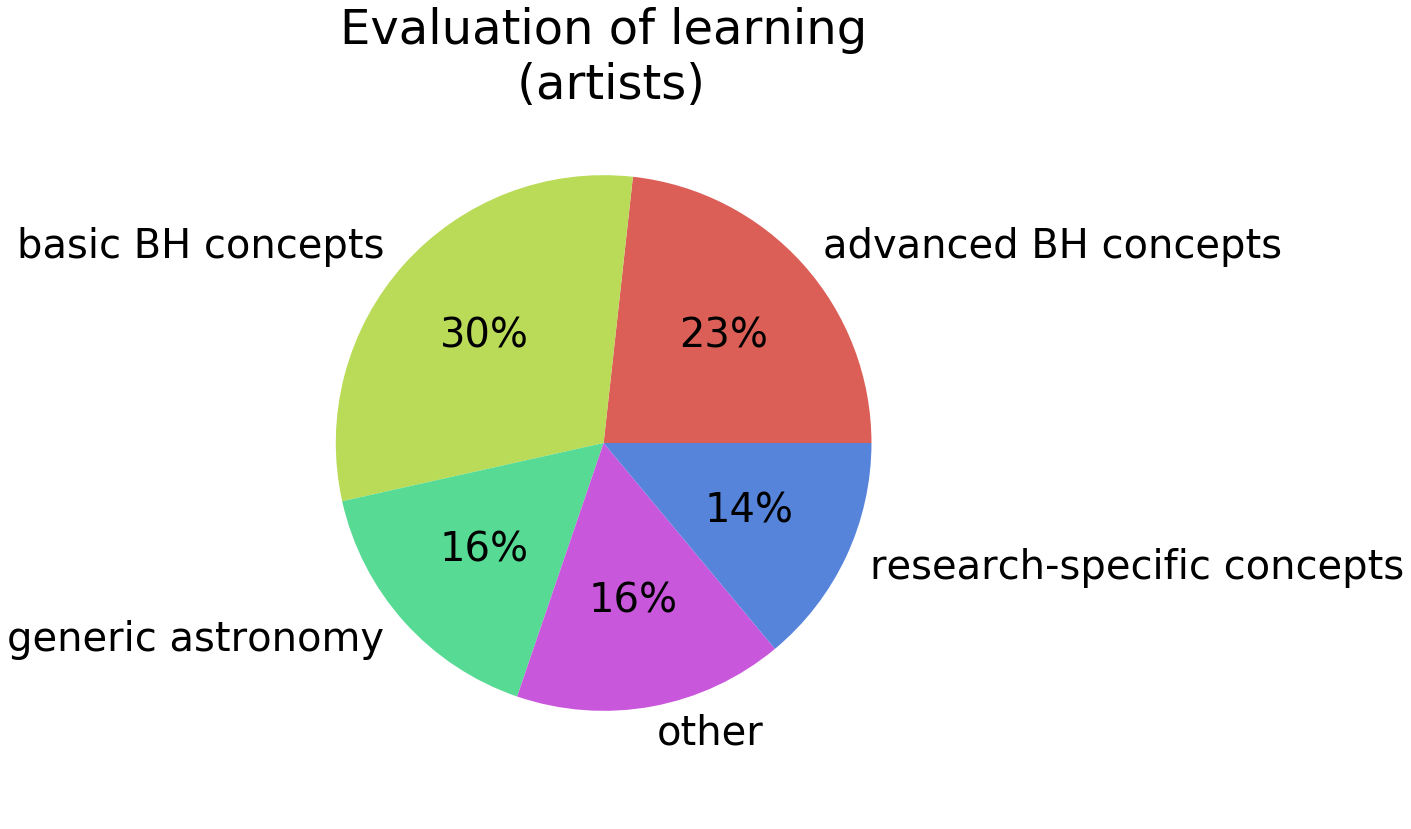

In [16]:
pal = sns.color_palette('hls',n_colors=5)

learning['Coded learning (artists)'].value_counts().sort_index().plot.pie(autopct='%1.0f%%',label='',colors=[pal[0],pal[1],pal[2],pal[4],pal[3]])
plt.title('Evaluation of learning\n (artists)')
plt.xlabel(' ')
plt.savefig('evallearning_artists_pie.png', bbox_inches='tight')